In [1]:
# KaggleX Cohert 4 Skill Assessment Challenge

## Import Library and Download Dataset

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import copy

2024-06-15 22:02:20.434736: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-15 22:02:20.434840: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-15 22:02:20.527934: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Dataset paths
train_path = "/kaggle/input/kagglex-car-price-prediction-dataset/train.csv"
test_path = "/kaggle/input/kagglex-car-price-prediction-dataset/test.csv"

df = pd.read_csv(train_path)
unedited_df = df.copy()
test_df = pd.read_csv(test_path)
unedited_test_df = test_df.copy()

## Check data

In [4]:
df.shape

(54273, 13)

In [5]:
test_df.shape

(36183, 12)

In [6]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [7]:
test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [8]:
df.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [11]:
df.nunique()

id              54273
brand              53
model            1827
model_year         34
milage           3212
fuel_type           7
engine           1061
transmission       46
ext_col           260
int_col           124
accident            2
clean_title         1
price            1481
dtype: int64

In [12]:
df.describe()

,id,model_year,milage,price
count,54273.000000,54273.000000,54273.000000,5.427300e+04
mean,27136.000000,2015.091979,72746.175667,3.921844e+04
std,15667.409917,5.588909,50469.490448,7.282634e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,13568.000000,2012.000000,32268.000000,1.550000e+04
50%,27136.000000,2016.000000,66107.000000,2.800000e+04
75%,40704.000000,2019.000000,102000.000000,4.500000e+04
max,54272.000000,2024.000000,405000.000000,2.954083e+06


### Based on the data
- #### Too many models and engine
- #### Engine could probably be broken down into more features

## Exploratory Data Analysis (EDA)

In [13]:
categorical_features = [
    "brand",
    "model",
    "fuel_type",
    "engine",
    "transmission",
    "ext_col",
    "int_col",
    "accident",
    "clean_title",
]

numerical_features = [
    "milage",
    "model_year",
]

print(f"Number of Columns: {len(df.columns)}")
print(f"Number of Categorical Features: {len(categorical_features)}")
print(f"Number of Numerical Features: {len(numerical_features)}")

Number of Columns: 13
Number of Categorical Features: 9
Number of Numerical Features: 2


### The 2 columns not used as features are:
- #### id
- #### price, which will be the label

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


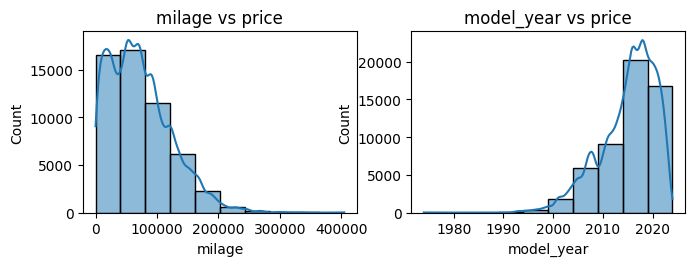

In [14]:
plt.figure(figsize=(12, 8))
for index, feature in enumerate(numerical_features, start=1):
    plt.subplot(3, 3, index)
    sns.histplot(data=df[feature], bins=10, kde=True)
    plt.title(f"{feature} vs price")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

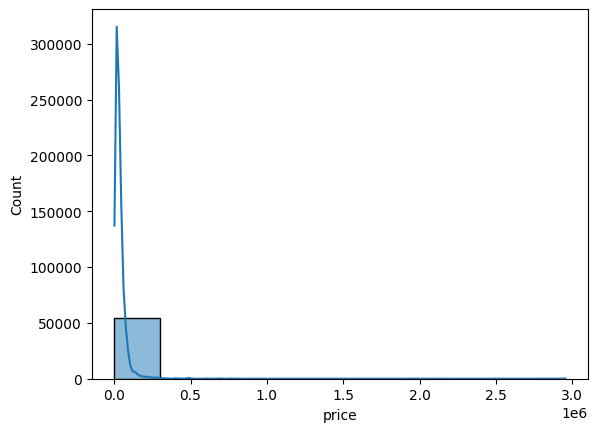

In [15]:
# Plot price
sns.histplot(data=df["price"], bins=10, kde=True)

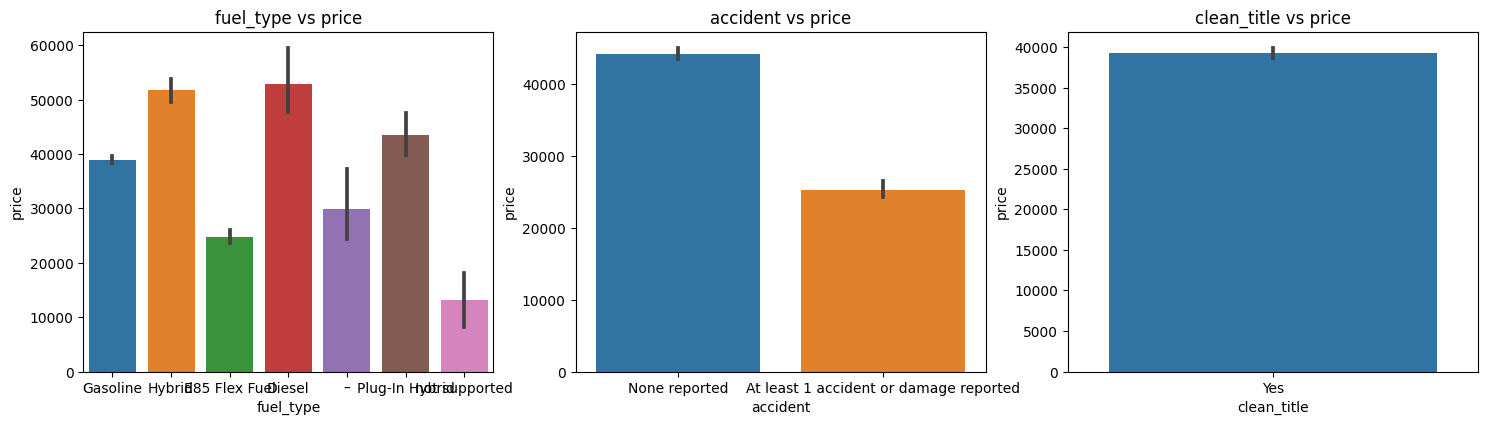

In [16]:
categorical_few_uniques_features = ["fuel_type", "accident", "clean_title"]

plt.figure(figsize=(18, 15))
for index, feature in enumerate(categorical_few_uniques_features, start=1):
    plt.subplot(3, 3, index)
    sns.barplot(data=df, x=feature, y="price")
    plt.title(f"{feature} vs price")
plt.show()

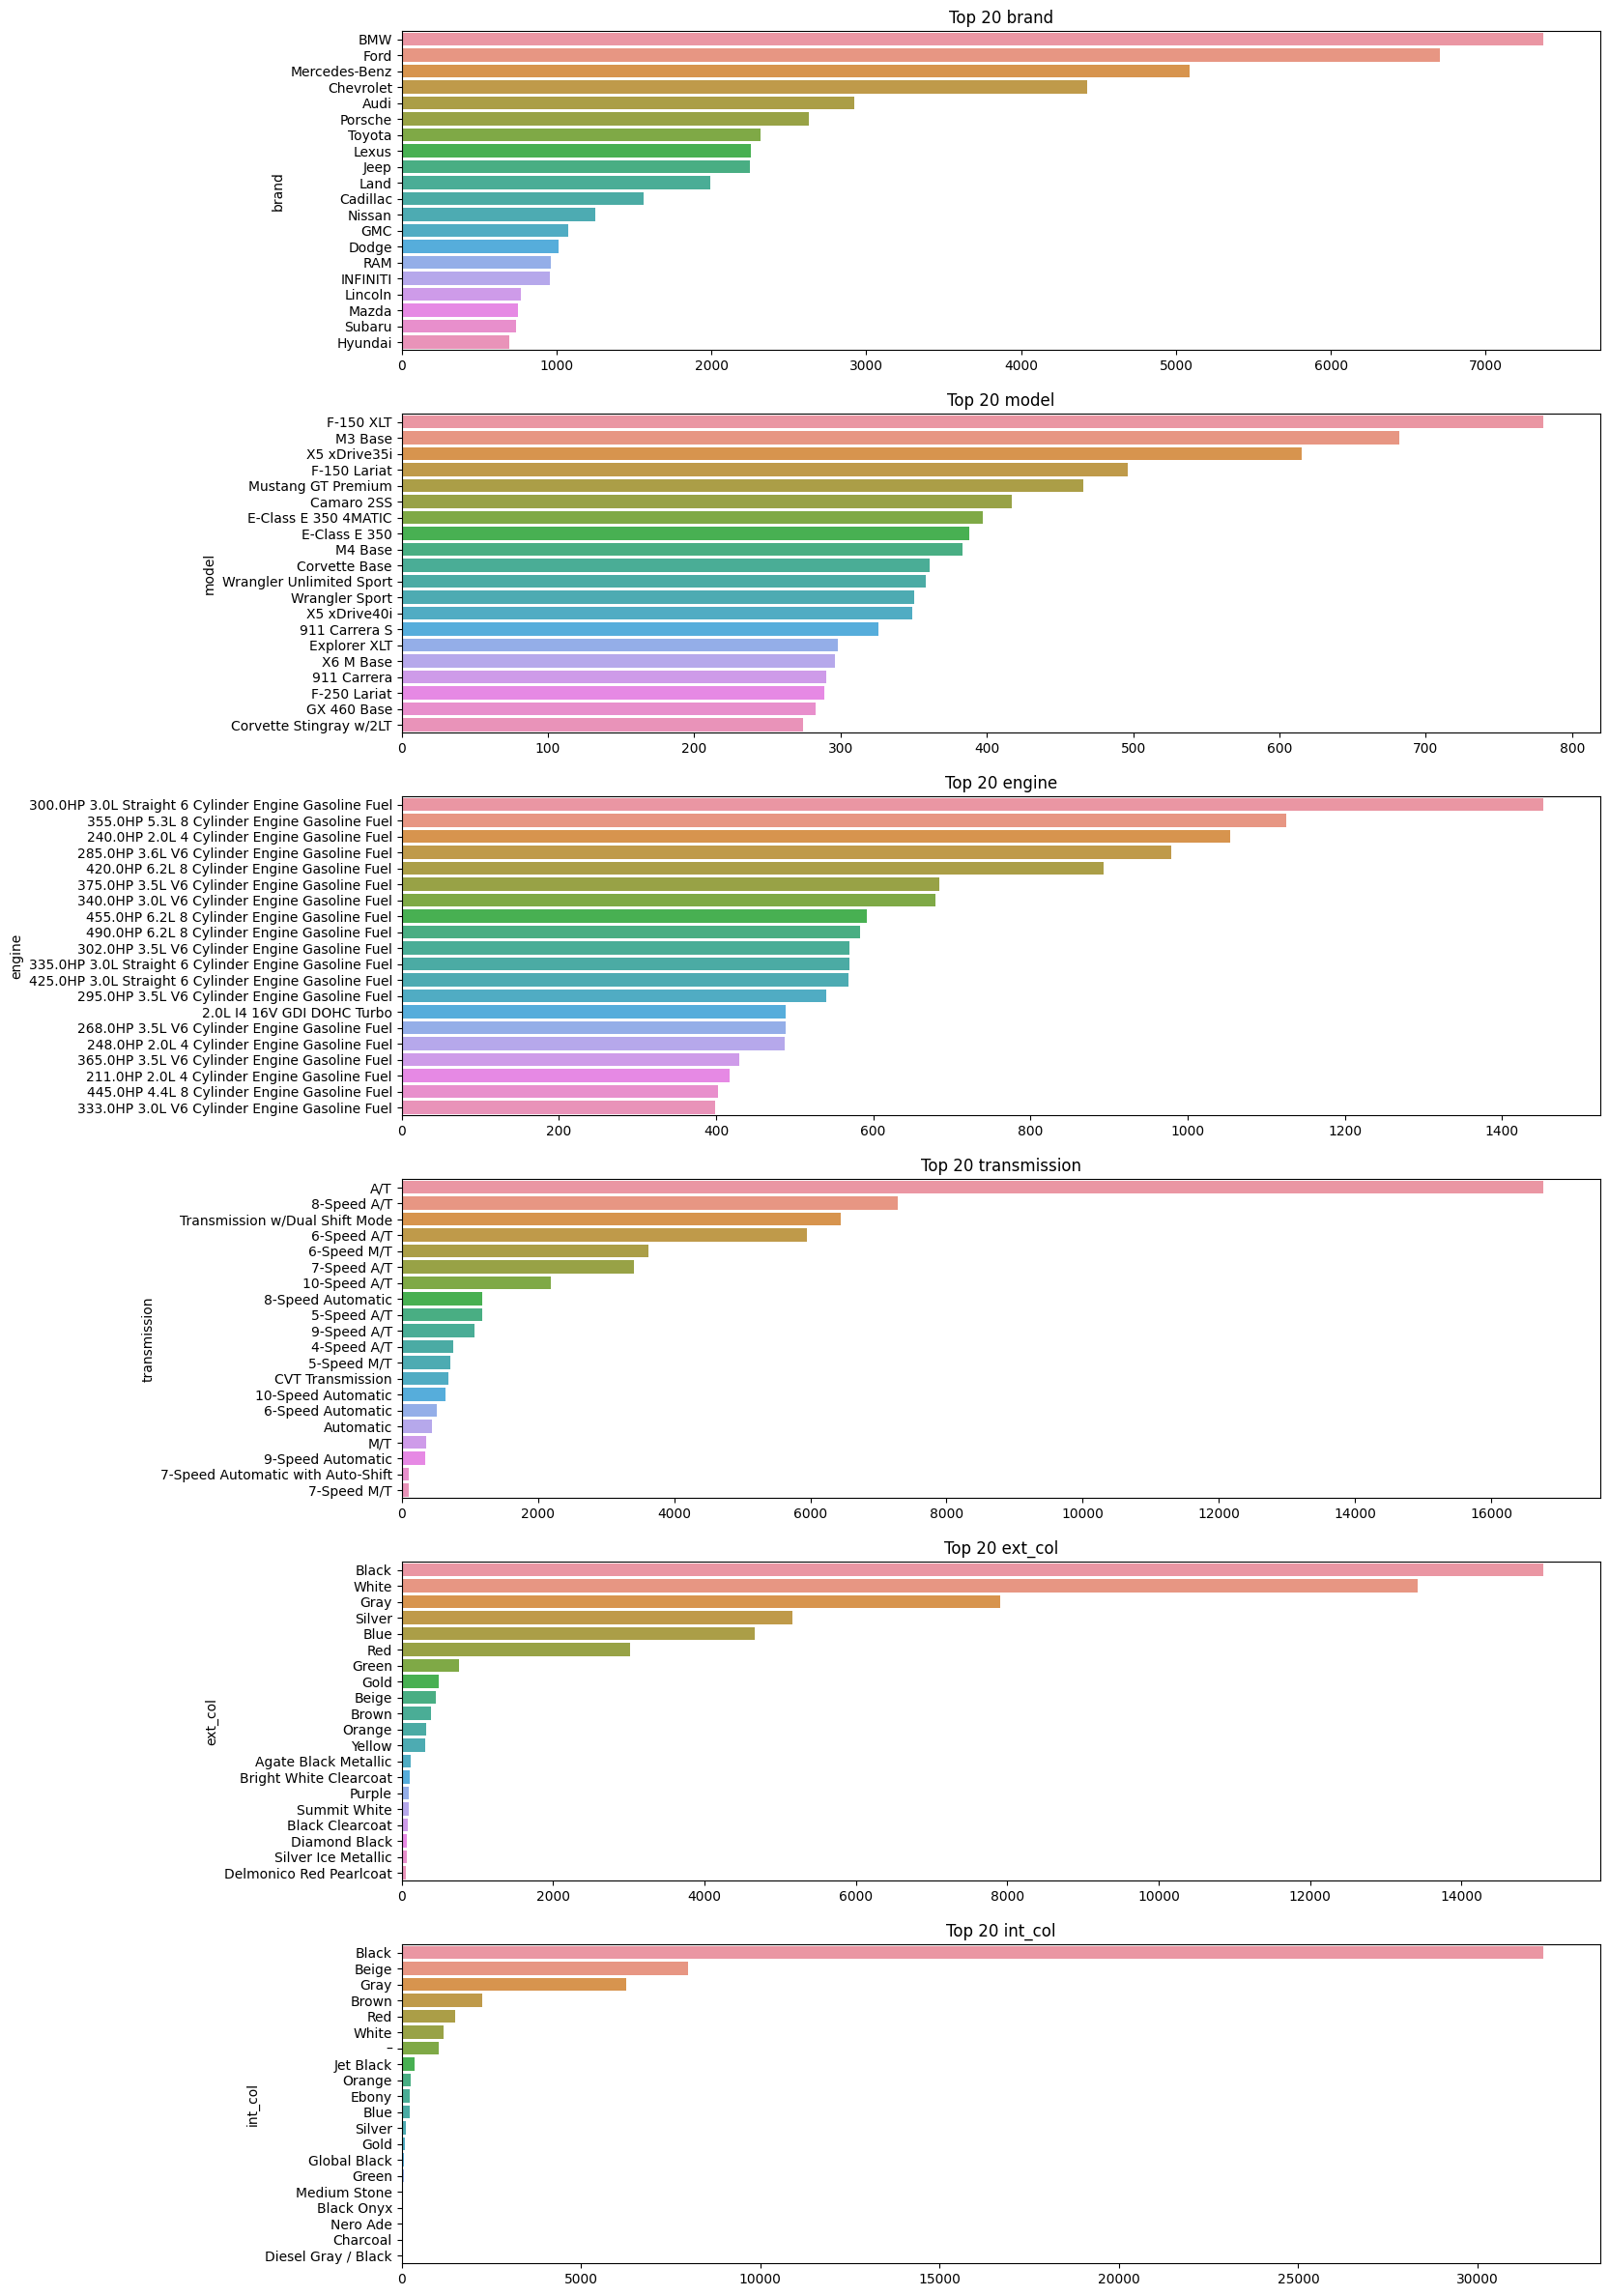

In [17]:
categorical_many_unique_features = [
    "brand",
    "model",
    "engine",
    "transmission",
    "ext_col",
    "int_col",
]

plt.figure(figsize=(16, 30))
for index, feature in enumerate(categorical_many_unique_features, start=1):
    common_features = df[feature].value_counts().head(20)
    plt.subplot(6, 1, index)
    sns.barplot(x=common_features.values, y=common_features.index)
    plt.title(f"Top 20 {feature}")

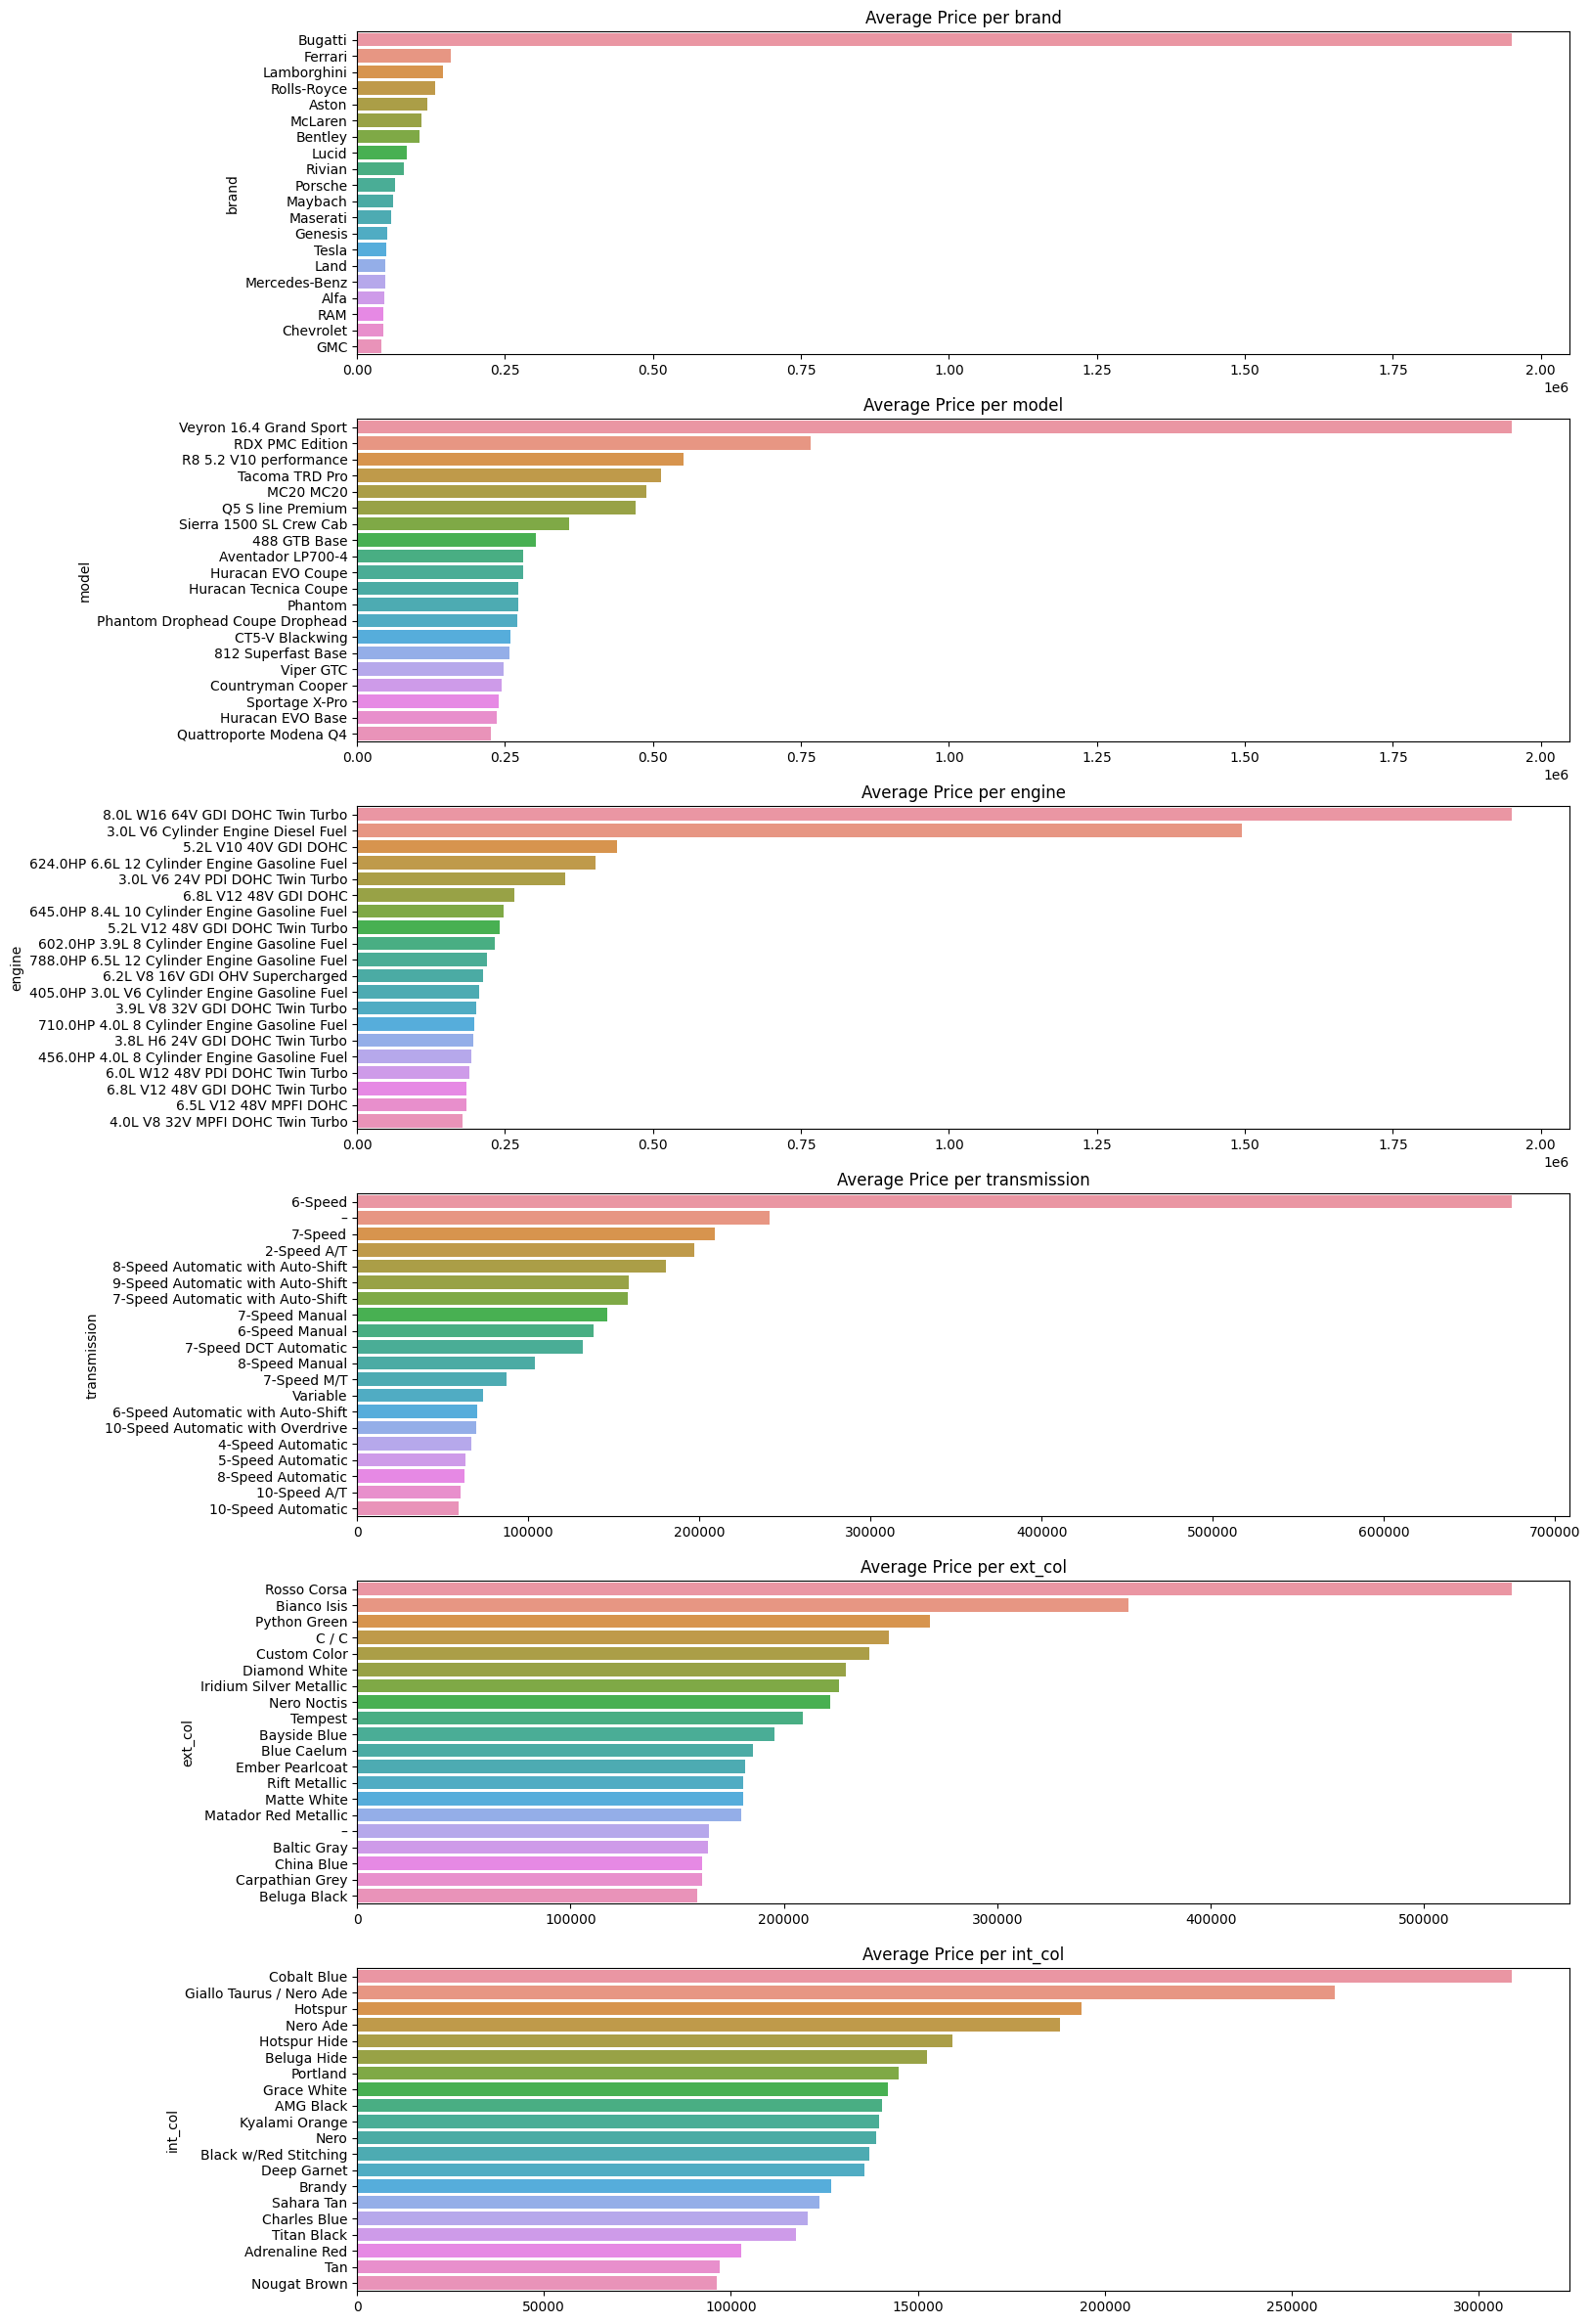

In [18]:
plt.figure(figsize=(16, 30))
for index, feature in enumerate(categorical_many_unique_features, start=1):
    feature_mean = df.groupby(feature)["price"].mean().sort_values(ascending=False).head(20)
    plt.subplot(6, 1, index)
    sns.barplot(x=feature_mean.values, y=feature_mean.index)
    plt.title(f"Average Price per {feature}")

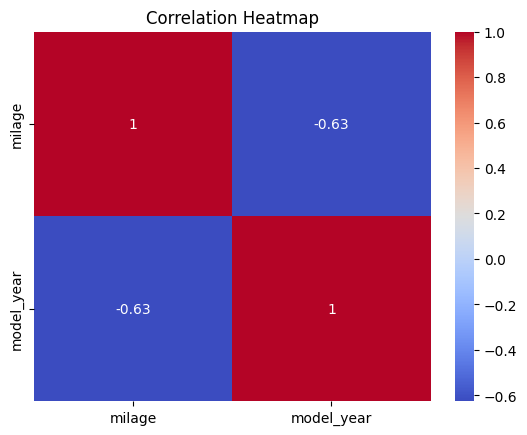

In [19]:
# Plot heatmap
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
# For testing
# df.groupby("model")["price"].mean().sort_values(ascending=False)
df["engine"].value_counts().head(50)
print(df.groupby("model")["price"].mean().sort_values(ascending=False))

df.groupby("model")["price"].mean().mean()

model
Veyron 16.4 Grand Sport    1.950995e+06
RDX PMC Edition            7.658155e+05
R8 5.2 V10 performance     5.511535e+05
Tacoma TRD Pro             5.139372e+05
MC20 MC20                  4.890000e+05
                               ...     
allroad 2.7T               5.833333e+03
RSX Base                   5.400000e+03
Vue Hybrid Base            4.370000e+03
S-10 LS                    4.200000e+03
Prowler Base               3.850000e+03
Name: price, Length: 1827, dtype: float64


42302.752114994466

## Data Preprocessing

### Simplifying model feature

In [21]:
# Simplify model feature by only getting the first word
prev_num_of_unique = unedited_df["model"].nunique()

df["model"] = df["model"].apply(lambda x: x.split(" ")[0])
test_df["model"] = df["model"].apply(lambda x: x.split(" ")[0])


print(prev_num_of_unique)
df["model"].nunique()

1827


502

### Cleaning Fuel Type

In [22]:
# Find the closest to mean
feature_ave_price = df.groupby("fuel_type")["price"].mean()

print(feature_ave_price)
feature_ave_price.mean()

fuel_type
Diesel            52801.151488
E85 Flex Fuel     24788.251521
Gasoline          38940.499747
Hybrid            51727.819366
Plug-In Hybrid    43514.280220
not supported     13098.750000
–                 29869.333333
Name: price, dtype: float64


36391.44081074288

#### Gasoline is closest to mean, so we replace nulls (–) with Gasoline

In [23]:
# Replace – with Gasoline in fuel features
prev_num_of_dashes = unedited_df["fuel_type"].value_counts().tail(50)

df["fuel_type"] = df["fuel_type"].apply(lambda x: x.replace("–", "Gasoline"))
test_df["fuel_type"] = test_df["fuel_type"].apply(lambda x: x.replace("–", "Gasoline"))


print(prev_num_of_dashes)
df["fuel_type"].value_counts().tail(50)

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
–                   294
Plug-In Hybrid      182
not supported         4
Name: count, dtype: int64


fuel_type
Gasoline          49733
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
Plug-In Hybrid      182
not supported         4
Name: count, dtype: int64

### Extract horsepower

In [24]:
def extract_horsepower(text):
    """ Filter horsepower using the HP keyword """
    words = text.split()
    for word in words:
        if word[-2:] == "HP":
            return int(float(word[:-2]))
    return "tmp"

In [25]:
# Ensure engine is not yet edited
df["engine"] = unedited_df["engine"]
test_df["engine"] = unedited_test_df["engine"]


# Filter the horsepower from engine feature
df["horsepower"] = df["engine"].apply(extract_horsepower)
test_df["horsepower"] = test_df["engine"].apply(extract_horsepower)

In [26]:
# Get the mean from the valid horsepowers to be used for no/invalid horsepower
with_horsepower = df.loc[df["horsepower"] != 'tmp', 'horsepower']
horsepower_ave = round(with_horsepower.mean())

print(horsepower_ave)

332


In [27]:
# Replace no/invalid horsepower to the average horsepower
df.loc[df["horsepower"] == "tmp","horsepower"] = horsepower_ave
test_df.loc[test_df["horsepower"] == "tmp","horsepower"] = horsepower_ave

In [28]:
# Convert the horsepower column/feature to int
df["horsepower"] = df["horsepower"].apply(pd.to_numeric)
test_df["horsepower"] = test_df["horsepower"].apply(pd.to_numeric)

In [29]:
# print(unedited_df["engine"].head())
# df["horsepower"].head()
df[["engine", "horsepower"]].head()

,engine,horsepower
0,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,375
1,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,300
2,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,300
3,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,335
4,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,200


### Extract displacement (Liters denoted as L)

In [30]:
def extract_displacement(text):
    """ Filter horsepower using the L and Liters keyword """
    words = text.split()
    for index, word in enumerate(words):
        if word[-1] == "L":
            return float(word[:-1])
#             return "VALID"
#             return text
        if  word == "Liter" and index > 0:
#             return "VALID" 
#             print(text[index - 1], word)
            return  float(words[index - 1])
#             return text

    return "tmp"
#     return text

In [31]:
# Ensure engine is not yet edited
df["engine"] = unedited_df["engine"]
test_df["engine"] = unedited_test_df["engine"]


# Filter the horsepower from engine feature
df["displacement"] = df["engine"].apply(extract_displacement)
test_df["displacement"] = test_df["engine"].apply(extract_displacement)

In [32]:
# Get the mean from the valid displacement to be used for no/invalid displacement
with_displacement = df.loc[df["displacement"] != 'tmp', 'displacement']
displacement_ave = round(with_displacement.mean(), 1)
displacement_ave

3.7

In [33]:
# Replace no/invalid displacement to the average displacement
df.loc[df["displacement"] == "tmp","displacement"] = displacement_ave
test_df.loc[test_df["displacement"] == "tmp","displacement"] = displacement_ave

In [34]:
# Convert the displacement column/feature to float
df["displacement"] = df["displacement"].apply(pd.to_numeric)
test_df["displacement"] = test_df["displacement"].apply(pd.to_numeric)

In [35]:
# print(unedited_df["engine"].head())
df[["engine", "displacement"]].head()

,engine,displacement
0,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,3.5
1,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,3.0
2,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,4.2
3,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,3.0
4,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,3.8


### Extract Number of Cylinders

In [36]:
def extract_num_cylinders(text):
    """ Filter horsepower using the L and Liters keyword """
#     print(text.split())
    words = text.split()
    types_of_cylinders = ["I", "H", "V", "W"]
    for index, word in enumerate(words):

        if  word == "Cylinder":
#             return "VALID" 
#             print(text[index - 1], word)
            return  int(words[index - 1])
#             return text

        if word[0] in types_of_cylinders:
            word = word.replace("-", "")
            if 2 <= len(word) <= 3 and word[1].isdigit():
#                 return "VALID" 
                return int(word[1:])
#             return text

    return "tmp"
#     return text

In [37]:
# Ensure engine is not yet edited
df["engine"] = unedited_df["engine"]
test_df["engine"] = unedited_test_df["engine"]

# Extract the num of cylinders from engine feature
df["num_cylinders"] = df["engine"].apply(extract_num_cylinders)
test_df["num_cylinders"] = test_df["engine"].apply(extract_num_cylinders)

In [38]:
# Get the mean from the valid num of cylinders to be used for no/invalid num of cylinders
with_num_cylinders = df.loc[df["num_cylinders"] != 'tmp', 'num_cylinders']
num_cylinders_ave = round(with_num_cylinders.mean())
num_cylinders_ave

6

In [39]:
# Replace no/invalid num of cylinders to the average num of cylinders
df.loc[df["num_cylinders"] == "tmp","num_cylinders"] = num_cylinders_ave
test_df.loc[test_df["num_cylinders"] == "tmp","num_cylinders"] = num_cylinders_ave

In [40]:
# Convert the num of cylinders column/feature to int
df["num_cylinders"] = df["num_cylinders"].apply(pd.to_numeric)
test_df["num_cylinders"] = test_df["num_cylinders"].apply(pd.to_numeric)

In [41]:
df[["engine", "num_cylinders"]].tail()

,engine,num_cylinders
54268,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8
54269,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,4
54270,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,6
54271,4.0L H6 24V GDI DOHC,6
54272,261.0HP 2.0L 4 Cylinder Engine Gasoline/Mild E...,4


### Extract engine shape

In [42]:
# TEST
df["engine"] = unedited_df["engine"]
feature = "engine"
combined_df = pd.concat([df, test_df])
combined_df["engine"].value_counts().tail(50)

# df.groupby(feature).head()
combined_df.nunique()

# df["engine"].value_counts().head(50)
# df["horsepower"] = df["engine"].apply(lambda x: x.split()[0])
# df["engine"].value_counts().head(50)


# # df.describe()
# test_df.loc[df["displacement"] != 'tmp', 'displacement'].value_counts().tail(50)

# df.loc[df["displacement"] != 'VALID', 'displacement'].mean()

# df.loc[ :, "displacement"].tail(50)
# df["engine"].tail(50)
# df[["engine", "num_cylinders"]].head(50)
df["num_cylinders"].value_counts().tail(50)
df["num_cylinders"].tail(50)

54223     4
54224     6
54225     8
54226     6
54227     6
54228     4
54229     4
54230     6
54231     6
54232     8
54233     8
54234     6
54235     4
54236     4
54237     8
54238     6
54239     8
54240     6
54241     8
54242     6
54243    12
54244     8
54245     6
54246     6
54247     8
54248     6
54249     4
54250     6
54251     8
54252     6
54253     8
54254     8
54255     6
54256     4
54257     6
54258     8
54259     8
54260     8
54261     6
54262     8
54263     8
54264     6
54265     6
54266     4
54267     6
54268     8
54269     4
54270     6
54271     6
54272     4
Name: num_cylinders, dtype: int64

In [43]:
623 / len(df) 

0.011479004293110755

In [44]:
21547 + 13 + 8 + 1 + 2

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             54273 non-null  int64  
 1   brand          54273 non-null  object 
 2   model          54273 non-null  object 
 3   model_year     54273 non-null  int64  
 4   milage         54273 non-null  int64  
 5   fuel_type      54273 non-null  object 
 6   engine         54273 non-null  object 
 7   transmission   54273 non-null  object 
 8   ext_col        54273 non-null  object 
 9   int_col        54273 non-null  object 
 10  accident       54273 non-null  object 
 11  clean_title    54273 non-null  object 
 12  price          54273 non-null  int64  
 13  horsepower     54273 non-null  int64  
 14  displacement   54273 non-null  float64
 15  num_cylinders  54273 non-null  int64  
dtypes: float64(1), int64(6), object(9)
memory usage: 6.6+ MB


### Separate Features and Labels

In [45]:
# Set features similar to the test set only without id column
features = df.copy()
features.pop("id")

# Remove price column in features and save it in labels
labels = features.pop("price")
features.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,horsepower,displacement,num_cylinders
0,Ford,F-150,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,375,3.5,6
1,BMW,335,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,300,3.0,6
2,Jaguar,XF,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,300,4.2,8
3,BMW,X7,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,335,3.0,6
4,Pontiac,Firebird,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,200,3.8,6


In [46]:
labels.head()

0    11000
1     8250
2    15000
3    63500
4     7850
Name: price, dtype: int64

## Split Dataset

In [47]:
# Split the dataset into train (70%) and remain (30%) subsets
train_features, remain_features, train_labels, remain_labels = sklearn.model_selection.train_test_split(
    features, 
    labels,
    test_size=0.3,
    shuffle=True
)

# Split the remain subset into valid (70%) and test (30%) subset
valid_features, test_features, valid_labels, test_labels = sklearn.model_selection.train_test_split(
    remain_features, 
    remain_labels,
    test_size=0.3,
    shuffle=True
)

In [48]:
# Check if indices of features and labels still match
print(train_features.head().index)
print(train_labels.head().index)

print(test_features.head().index)
print(test_labels.head().index)

print(valid_features.head().index)
print(valid_labels.head().index)

Index([41463, 46392, 53421, 18976, 13353], dtype='int64')
Index([41463, 46392, 53421, 18976, 13353], dtype='int64')
Index([20823, 19469, 52915, 23348, 24918], dtype='int64')
Index([20823, 19469, 52915, 23348, 24918], dtype='int64')
Index([8940, 35251, 19753, 18493, 13295], dtype='int64')
Index([8940, 35251, 19753, 18493, 13295], dtype='int64')


In [49]:
# Check if dataset were split correctly
dataset_size = len(df)
print(dataset_size * 0.7, len(train_features), len(train_labels))
print(dataset_size * 0.3 * 0.7, len(valid_features), len(valid_labels))
print(dataset_size * 0.3 * 0.3, len(test_features), len(test_labels))

# Check if total of the subsets the same as dataset_size
dataset_size, len(train_features) + len(valid_features) + len(test_features), len(train_labels) + len(valid_labels) + len(test_labels)

37991.1 37991 37991
11397.33 11397 11397
4884.57 4885 4885


(54273, 54273, 54273)

## Build the model

In [50]:
model = tf.keras.Sequential(
    [
        # Input Layer, Normalized Layer Here 
        tf.keras.layers.Dense(units=128, activation="relu", name="Hidden Layer"),
        tf.keras.layers.Dense(units=1, activation="softmax", name="Output Layer"),
    ]
)



model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.MeanSquaredError()],
)

## Train Model

In [51]:
# View an example of input
train_features

# Model fit

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,horsepower,displacement,num_cylinders
41463,BMW,M6,2015,48000,Gasoline,560.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,None reported,Yes,560,4.4,8
46392,Subaru,BRZ,2013,116000,Gasoline,200.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,At least 1 accident or damage reported,Yes,200,2.0,4
53421,Porsche,Cayenne,2023,10000,Gasoline,453.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,Gray,Red,None reported,Yes,453,4.0,8
18976,Mercedes-Benz,S-Class,2018,79876,Gasoline,463.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,A/T,Gray,Beige,None reported,Yes,463,4.0,8
13353,Ford,F-150,2019,60000,Gasoline,325.0HP 2.7L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,325,2.7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,Mercedes-Benz,GL-Class,2013,174000,Gasoline,335.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,A/T,Brown,Black,At least 1 accident or damage reported,Yes,335,4.6,8
43056,BMW,M6,2018,27965,Gasoline,560.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Orange,Orange,None reported,Yes,560,4.4,8
19725,Audi,S4,2018,28000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,White,Red,None reported,Yes,333,3.0,6
35804,Hyundai,Genesis,2012,60000,Gasoline,344.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,344,3.8,6


## Predict

TODO
- build model
- separate engine into different parameters
- remove id on train
- train model
- early stop
- graph result
- group lines
- find outliers

In [52]:
# train_subset.shape

In [53]:
# valid_subset.shape

In [54]:
# test_subset.shape